# EDA on the `MLA_100k_checked_v3` dataset

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from utils import *

## Load the dataset

In [2]:
X_dataframe = pd.read_csv("../data/X_dataframe.csv")
X_dataframe.head()

,seller_address,warranty,base_price,shipping,non_mercado_pago_payment_methods,seller_id,variations,listing_type_id,price,attributes,...,date_created,secure_thumbnail,stop_time,status,video_id,initial_quantity,start_time,sold_quantity,available_quantity,used
0,"{'country': {'name': 'Argentina', 'id': 'AR'},...",NaN,80.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",8208882349,[],bronze,80.0,[],...,2015-09-05T20:42:53.000Z,https://a248.e.akamai.net/mla-s1-p.mlstatic.co...,1446669773000,active,NaN,1,1441485773000,0,1,False
1,"{'country': {'name': 'Argentina', 'id': 'AR'},...",NUESTRA REPUTACION,2650.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",8141699488,[],silver,2650.0,[],...,2015-09-26T18:08:30.000Z,https://a248.e.akamai.net/mla-s1-p.mlstatic.co...,1448474910000,active,NaN,1,1443290910000,0,1,True
2,"{'country': {'name': 'Argentina', 'id': 'AR'},...",NaN,60.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",8386096505,[],bronze,60.0,[],...,2015-09-09T23:57:07.000Z,https://a248.e.akamai.net/mla-s1-p.mlstatic.co...,1447027027000,active,NaN,1,1441843027000,0,1,True
3,"{'country': {'name': 'Argentina', 'id': 'AR'},...",NaN,580.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",5377752182,[],silver,580.0,[],...,2015-09-28T18:47:56.000Z,https://a248.e.akamai.net/mla-s2-p.mlstatic.co...,1449191596000,active,NaN,1,1443466076000,0,1,False
4,"{'country': {'name': 'Argentina', 'id': 'AR'},...",MI REPUTACION.,30.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",2938071313,[],bronze,30.0,[],...,2015-08-24T22:07:20.000Z,https://a248.e.akamai.net/mla-s2-p.mlstatic.co...,1445638040000,active,NaN,1,1440454040000,0,1,True


### Initial Quantity

In [3]:
X_dataframe["initial_quantity"].describe()

count    90000.000000
mean        34.957178
std        421.091981
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max       9999.000000
Name: initial_quantity, dtype: float64

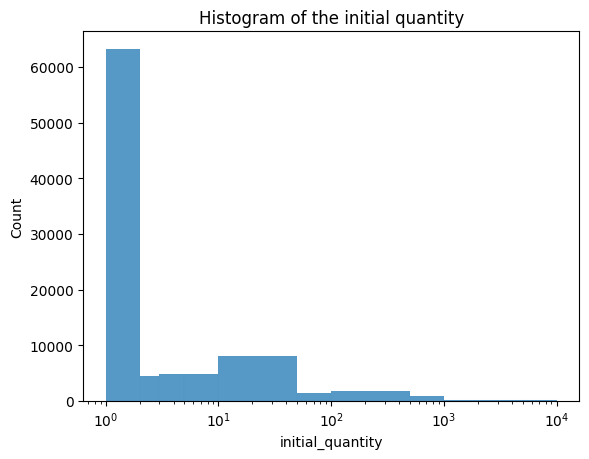

In [4]:
sns.histplot(X_dataframe["initial_quantity"], bins = [0, 1, 2, 3, 5, 10, 50, 100, 500, 1000, 5000, 10000])
plt.title("Histogram of the initial quantity")
plt.xscale("log")
plt.show()


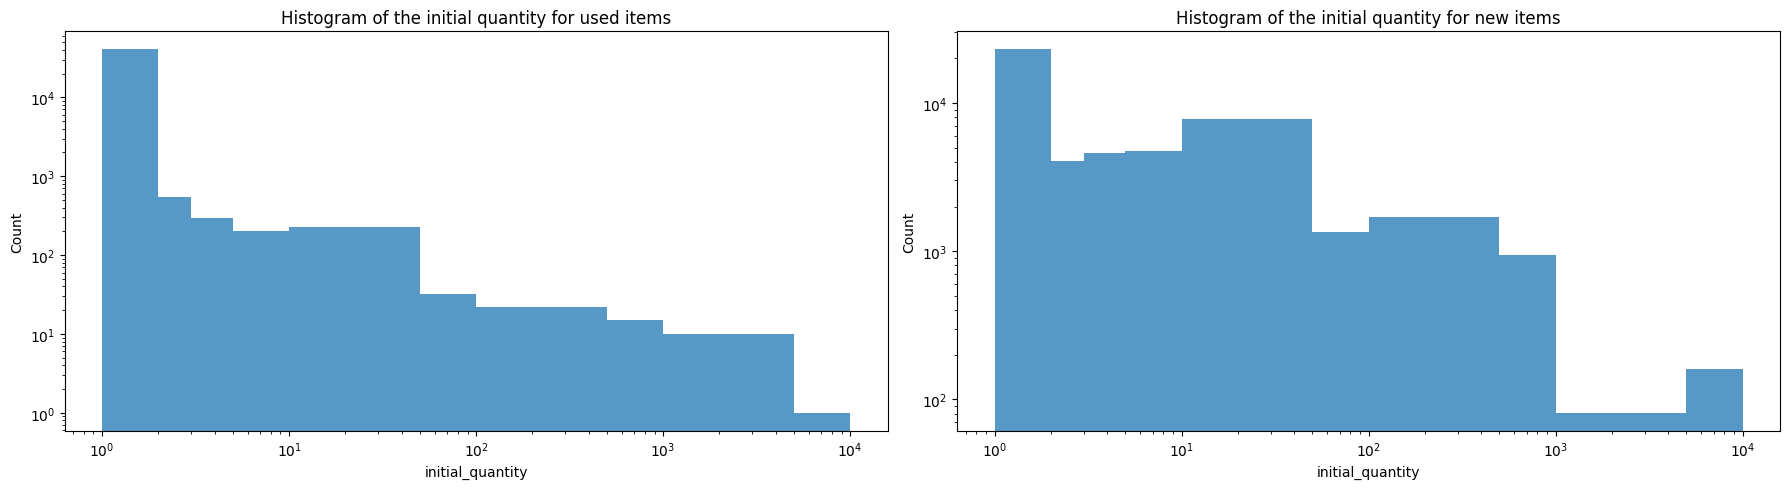

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(18, 5))

sns.histplot(X_dataframe.loc[X_dataframe["used"] == 1]["initial_quantity"], ax=ax[0], bins = [0, 1, 2, 3, 5, 10, 50, 100, 500, 1000, 5000, 10000])
ax[0].set_title("Histogram of the initial quantity for used items")
ax[0].set_yscale("log")
ax[0].set_xscale("log")

sns.histplot(X_dataframe.loc[X_dataframe["used"] == 0]["initial_quantity"], ax=ax[1], bins = [0, 1, 2, 3, 5, 10, 50, 100, 500, 1000, 5000, 10000])
ax[1].set_title("Histogram of the initial quantity for new items")
ax[1].set_yscale("log")
ax[1].set_xscale("log")
plt.tight_layout()
plt.show()

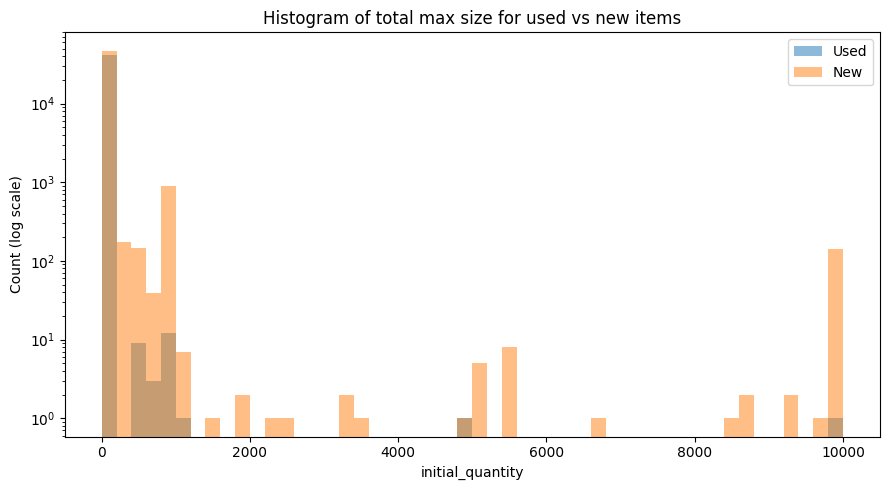

In [6]:
fig, ax = plt.subplots(figsize=(9, 5))
ax.hist(
    X_dataframe.loc[X_dataframe["used"] == 1, "initial_quantity"],
    bins=50,
    alpha=0.5,  # transparency
    label="Used",
    color="tab:blue",
)

# New items
ax.hist(
    X_dataframe.loc[X_dataframe["used"] == 0, "initial_quantity"],
    bins=50,
    alpha=0.5,
    label="New",
    color="tab:orange",
)

ax.set_yscale("log")
ax.set_title("Histogram of total max size for used vs new items")
ax.set_xlabel("initial_quantity")
ax.set_ylabel("Count (log scale)")
ax.legend()

plt.tight_layout()
plt.show()

The distribution is very different for used and new items

In [7]:
X_dataframe["new"] = X_dataframe["used"] == 0

pearson_corr = X_dataframe[["new", "initial_quantity"]].corr(method="pearson")
spearman_corr = X_dataframe[["new", "initial_quantity"]].corr(method="spearman")
kendall_corr = X_dataframe[["new", "initial_quantity"]].corr(method="kendall")
print("Pearson correlation: ", pearson_corr)
print("Spearman correlation: ", spearman_corr)
print("Kendall correlation: ", kendall_corr)

Pearson correlation:                         new  initial_quantity
new               1.000000          0.072434
initial_quantity  0.072434          1.000000
Spearman correlation:                         new  initial_quantity
new               1.000000          0.533531
initial_quantity  0.533531          1.000000
Kendall correlation:                         new  initial_quantity
new               1.000000          0.498395
initial_quantity  0.498395          1.000000


### Available Quantity

In [8]:
X_dataframe["available_quantity"].describe()

count    90000.000000
mean        34.700767
std        420.811703
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max       9999.000000
Name: available_quantity, dtype: float64

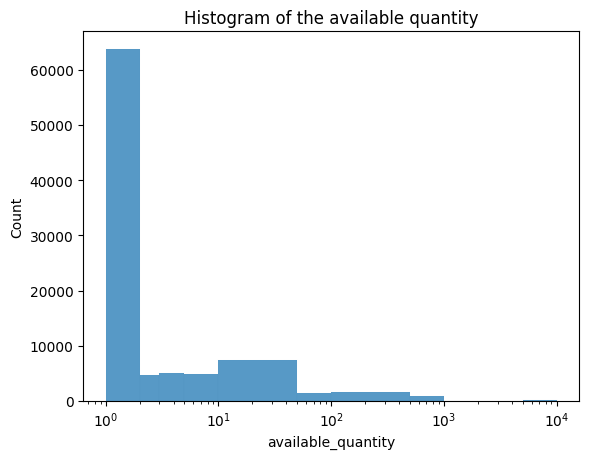

In [9]:
sns.histplot(
    X_dataframe["available_quantity"],
    bins=[0, 1, 2, 3, 5, 10, 50, 100, 500, 1000, 5000, 10000],
)
plt.title("Histogram of the available quantity")
plt.xscale("log")
plt.show()

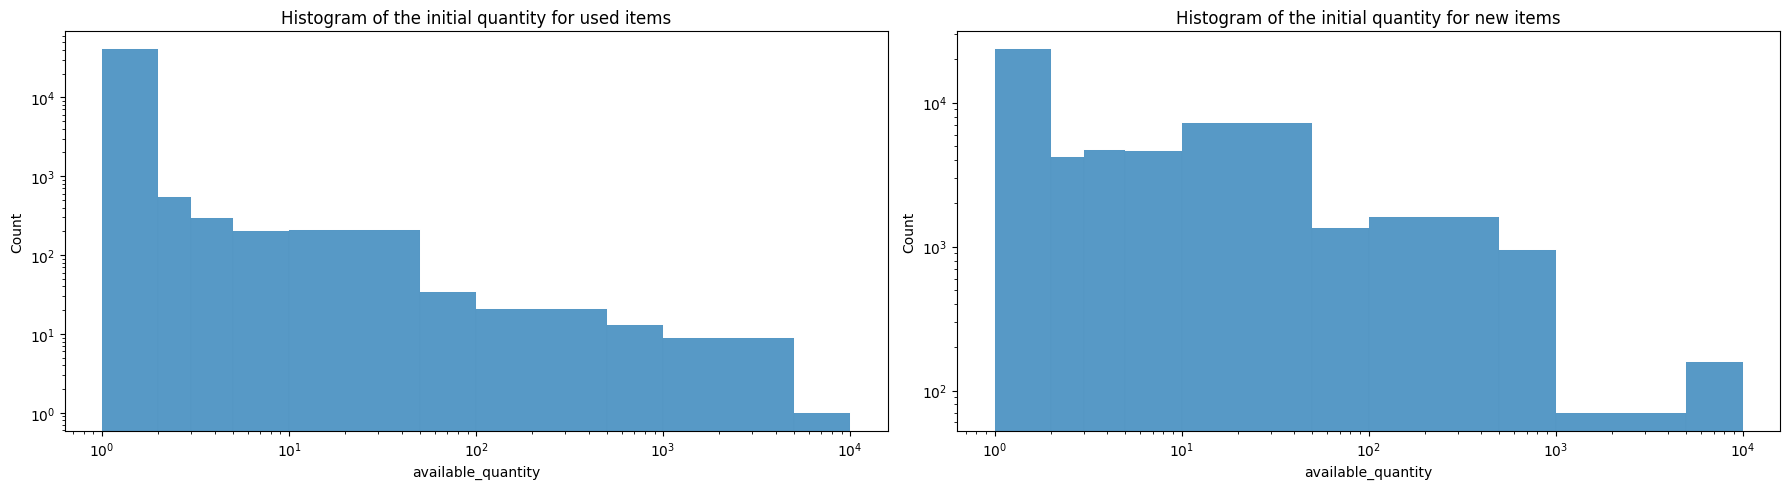

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(18, 5))

sns.histplot(
    X_dataframe.loc[X_dataframe["used"] == 1]["available_quantity"],
    ax=ax[0],
    bins=[0, 1, 2, 3, 5, 10, 50, 100, 500, 1000, 5000, 10000],
)
ax[0].set_title("Histogram of the initial quantity for used items")
ax[0].set_yscale("log")
ax[0].set_xscale("log")

sns.histplot(
    X_dataframe.loc[X_dataframe["used"] == 0]["available_quantity"],
    ax=ax[1],
    bins=[0, 1, 2, 3, 5, 10, 50, 100, 500, 1000, 5000, 10000],
)
ax[1].set_title("Histogram of the initial quantity for new items")
ax[1].set_yscale("log")
ax[1].set_xscale("log")
plt.tight_layout()
plt.show()

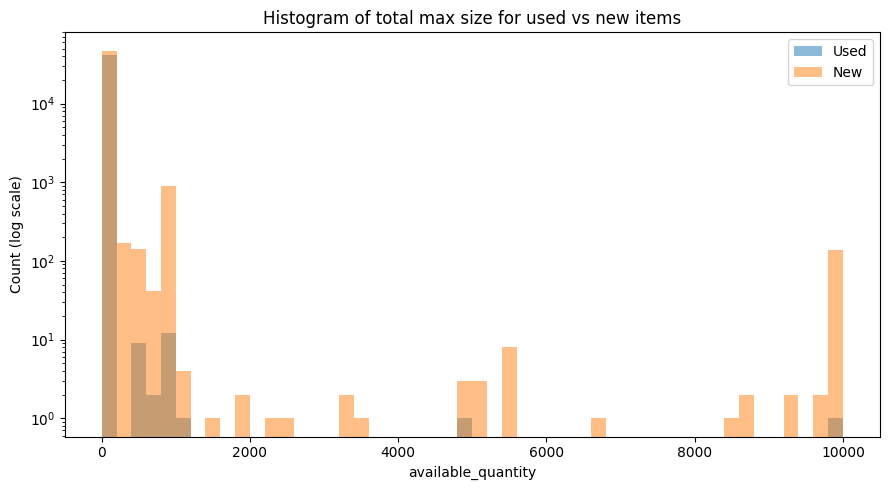

In [11]:
fig, ax = plt.subplots(figsize=(9, 5))
ax.hist(
    X_dataframe.loc[X_dataframe["used"] == 1, "available_quantity"],
    bins=50,
    alpha=0.5,  # transparency
    label="Used",
    color="tab:blue",
)

# New items
ax.hist(
    X_dataframe.loc[X_dataframe["used"] == 0, "available_quantity"],
    bins=50,
    alpha=0.5,
    label="New",
    color="tab:orange",
)

ax.set_yscale("log")
ax.set_title("Histogram of total max size for used vs new items")
ax.set_xlabel("available_quantity")
ax.set_ylabel("Count (log scale)")
ax.legend()

plt.tight_layout()
plt.show()

In [12]:
X_dataframe["new"] = X_dataframe["used"] == 0

pearson_corr = X_dataframe[["new", "available_quantity"]].corr(method="pearson")
spearman_corr = X_dataframe[["new", "available_quantity"]].corr(method="spearman")
kendall_corr = X_dataframe[["new", "available_quantity"]].corr(method="kendall")
print("Pearson correlation: ", pearson_corr)
print("Spearman correlation: ", spearman_corr)
print("Kendall correlation: ", kendall_corr)

Pearson correlation:                           new  available_quantity
new                 1.000000            0.071967
available_quantity  0.071967            1.000000
Spearman correlation:                           new  available_quantity
new                 1.000000            0.526895
available_quantity  0.526895            1.000000
Kendall correlation:                           new  available_quantity
new                 1.000000            0.492828
available_quantity  0.492828            1.000000


Quite high correlation with available quantity and the newer the product is

### Sold Quantity

In [13]:
X_dataframe["sold_quantity"].describe()

count    90000.000000
mean         2.328044
std         33.839328
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       6065.000000
Name: sold_quantity, dtype: float64

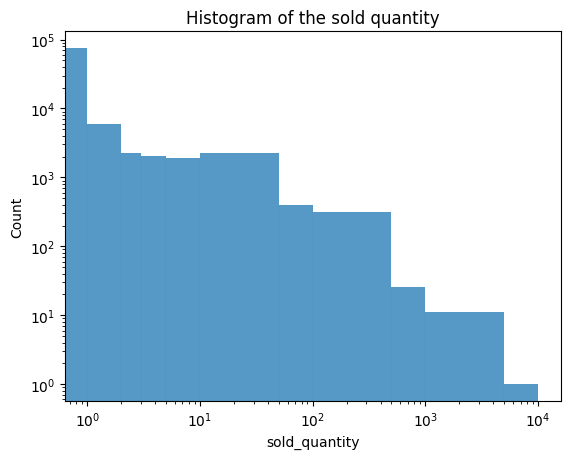

In [14]:
sns.histplot(
    X_dataframe["sold_quantity"],
    bins=[0, 1, 2, 3, 5, 10, 50, 100, 500, 1000, 5000, 10000],
)
plt.title("Histogram of the sold quantity")
plt.xscale("log")
plt.yscale("log")
plt.show()

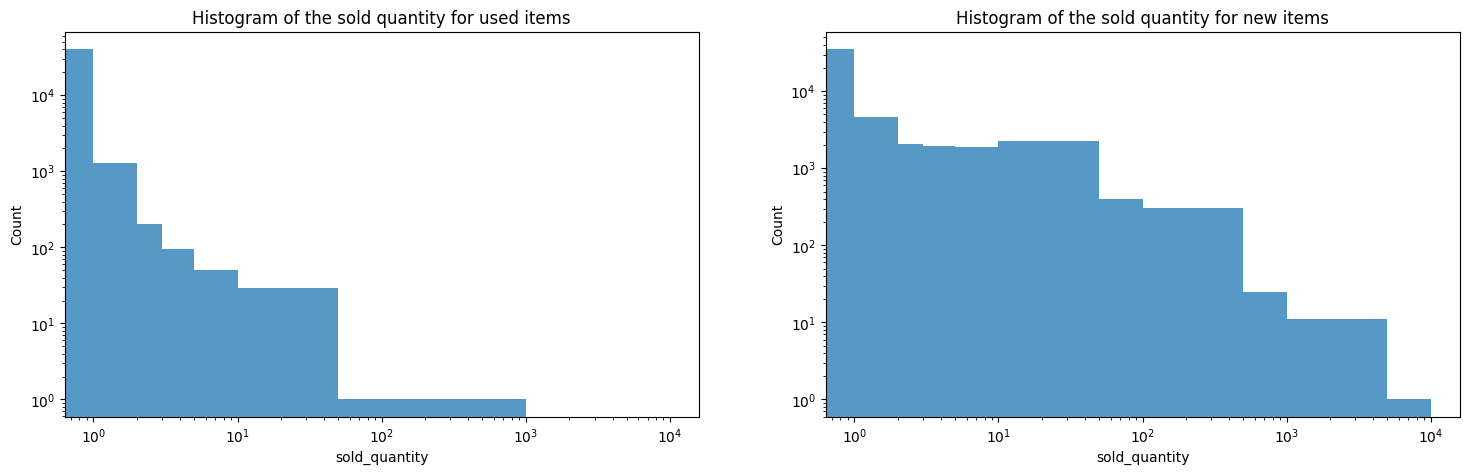

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(18, 5))

sns.histplot(
    X_dataframe.loc[X_dataframe["used"] == 1]["sold_quantity"],
    ax=ax[0],
    bins=[0, 1, 2, 3, 5, 10, 50, 100, 500, 1000, 5000, 10000],
)
ax[0].set_title("Histogram of the sold quantity for used items")
ax[0].set_yscale("log")
ax[0].set_xscale("log")

sns.histplot(
    X_dataframe.loc[X_dataframe["used"] == 0]["sold_quantity"],
    ax=ax[1],
    bins=[0, 1, 2, 3, 5, 10, 50, 100, 500, 1000, 5000, 10000],
)
ax[1].set_title("Histogram of the sold quantity for new items")
ax[1].set_yscale("log")
ax[1].set_xscale("log")

plt.show()

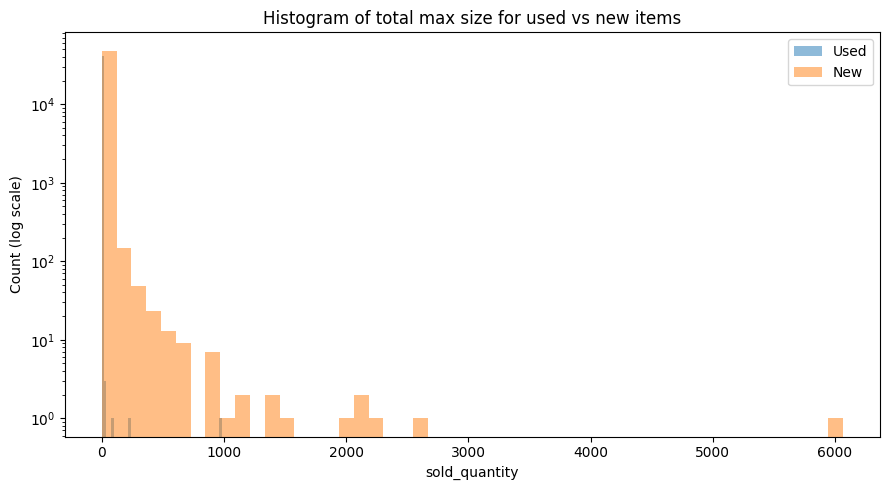

In [16]:
fig, ax = plt.subplots(figsize=(9, 5))
ax.hist(
    X_dataframe.loc[X_dataframe["used"] == 1, "sold_quantity"],
    bins=50,
    alpha=0.5,  # transparency
    label="Used",
    color="tab:blue",
)

# New items
ax.hist(
    X_dataframe.loc[X_dataframe["used"] == 0, "sold_quantity"],
    bins=50,
    alpha=0.5,
    label="New",
    color="tab:orange",
)

ax.set_yscale("log")
ax.set_title("Histogram of total max size for used vs new items")
ax.set_xlabel("sold_quantity")
ax.set_ylabel("Count (log scale)")
ax.legend()

plt.tight_layout()
plt.show()

In [17]:
pearson_corr = X_dataframe[["new", "sold_quantity"]].corr(method="pearson")
spearman_corr = X_dataframe[["new", "sold_quantity"]].corr(method="spearman")
kendall_corr = X_dataframe[["new", "sold_quantity"]].corr(method="kendall")
print("Pearson correlation: ", pearson_corr)
print("Spearman correlation: ", spearman_corr)
print("Kendall correlation: ", kendall_corr)

Pearson correlation:                      new  sold_quantity
new            1.000000       0.061176
sold_quantity  0.061176       1.000000
Spearman correlation:                      new  sold_quantity
new            1.000000       0.323669
sold_quantity  0.323669       1.000000
Kendall correlation:                      new  sold_quantity
new            1.000000       0.312783
sold_quantity  0.312783       1.000000
